In [148]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import boxcox
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [149]:
#Read the netflix_data.csv and put the values into a dataframe
netdf = pd.read_csv('netflix_data.csv') 
print(netdf)

                                          Title  \
0                              Lets Fight Ghost   
1                           HOW TO BUILD A GIRL   
2                              The Con-Heartist   
3                                  Gleboka woda   
4                                 Only a Mother   
...                                         ...   
9420                             13 Going on 30   
9421                                   LIFE 2.0   
9422                              Brand New Day   
9423                Daniel Arends: Blessuretijd   
9424  DreamWorks Happy Holidays from Madagascar   

                                       Genre  \
0     Crime, Drama, Fantasy, Horror, Romance   
1                                     Comedy   
2                            Comedy, Romance   
3                                      Drama   
4                                      Drama   
...                                      ...   
9420                Comedy, Fantasy, Romance   
942

In [150]:
#Dropped two empty columns from the dataframe
netdf.drop(netdf.columns[[29,30]], axis=1, inplace=True)
netdf.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


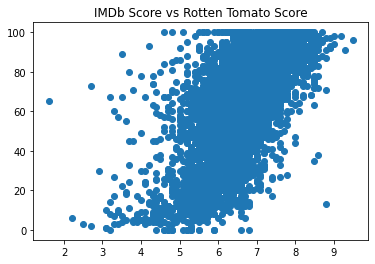

Spearmans correlation: 0.664


In [151]:
#Measured the correlation between IMDb Score and Rotten Tomatoes Score
score_rotten = netdf.dropna(subset=['IMDb Score', 'Rotten Tomatoes Score'])
pyplot.scatter(netdf['IMDb Score'], netdf['Rotten Tomatoes Score'])
pyplot.title('IMDb Score vs Rotten Tomato Score')
pyplot.show()
spearman, _ = spearmanr(score_rotten['IMDb Score'], score_rotten['Rotten Tomatoes Score'])
print('Spearmans correlation: %.3f' % spearman)

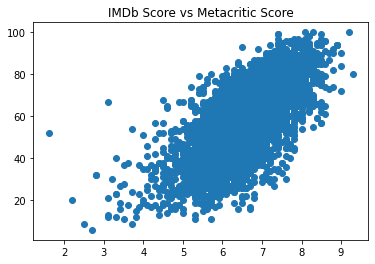

Spearmans correlation: 0.693


In [152]:
#Measured the correlation between IMDb Score and Metacritic Score
score_meta = netdf.dropna(subset=['IMDb Score', 'Metacritic Score'])
pyplot.scatter(netdf['IMDb Score'], netdf['Metacritic Score'])
pyplot.title('IMDb Score vs Metacritic Score')
pyplot.show()
spearman, _ = spearmanr(score_meta['IMDb Score'], score_meta['Metacritic Score'])
print('Spearmans correlation: %.3f' % spearman)

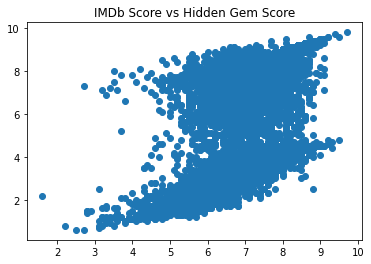

Spearmans correlation: 0.452


In [153]:
#Measured the correlation between IMDb Score and Hidden Gem Score
score_gem = netdf.dropna(subset=['IMDb Score', 'Hidden Gem Score'])
pyplot.scatter(netdf['IMDb Score'], netdf['Hidden Gem Score'])
pyplot.title('IMDb Score vs Hidden Gem Score')
pyplot.show()
spearman, _ = spearmanr(score_gem['IMDb Score'], score_gem['Hidden Gem Score'])
print('Spearmans correlation: %.3f' % spearman)

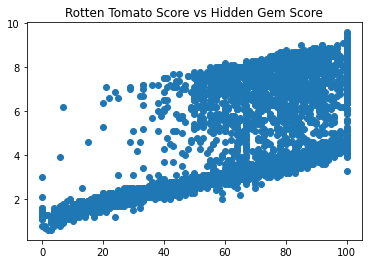

Spearmans correlation: 0.693


In [154]:
#Measured the correlation between Hidden Gem Score and Rotten Tomatoes Score
rotten_gem = netdf.dropna(subset=['Rotten Tomatoes Score', 'Hidden Gem Score'])
pyplot.scatter(netdf['Rotten Tomatoes Score'], netdf['Hidden Gem Score'])
pyplot.title('Rotten Tomato Score vs Hidden Gem Score')
pyplot.show()
spearman, _ = spearmanr(rotten_gem['Rotten Tomatoes Score'], rotten_gem['Hidden Gem Score'])
print('Spearmans correlation: %.3f' % spearman)

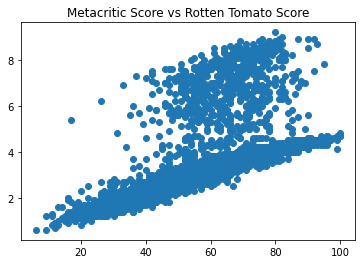

Spearmans correlation: 0.812


In [155]:
#Measured the correlation between Metacritic Score and Hidden Gem Score
meta_gem = netdf.dropna(subset=['Metacritic Score', 'Hidden Gem Score'])
pyplot.scatter(netdf['Metacritic Score'], netdf['Hidden Gem Score'])
pyplot.title('Metacritic Score vs Rotten Tomato Score')
pyplot.show()
spearman, _ = spearmanr(meta_gem['Metacritic Score'], meta_gem['Hidden Gem Score'])
print('Spearmans correlation: %.3f' % spearman)

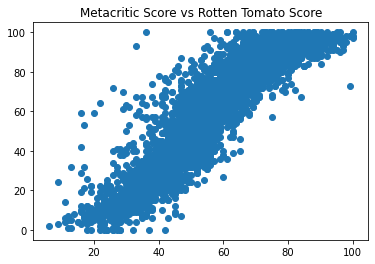

Spearmans correlation: 0.915


In [156]:
#Measured the correlation between Metacritic Score and Rotten Tomatoes Score
meta_rotten = netdf.dropna(subset=['Metacritic Score', 'Rotten Tomatoes Score'])
pyplot.scatter(netdf['Metacritic Score'], netdf['Rotten Tomatoes Score'])
pyplot.title('Metacritic Score vs Rotten Tomato Score')
pyplot.show()
spearman, _ = spearmanr(meta_rotten['Metacritic Score'], meta_rotten['Rotten Tomatoes Score'])
print('Spearmans correlation: %.3f' % spearman)

#Out of all the metrics, Rotten Tomatoes and Metacritic are both evaluted using professional critic ratings. As such, it makes sense that
#they would correlate the most.

In [157]:
#Creating a weighted average of each rating metric in relation to other rating metrics using Spearmans correlation values
imdb_corr = (0.664 + 0.693 + 0.452) / 3.0
rotten_corr = (0.664 + 0.693 + 0.915) / 3.0
gem_corr = (0.452 + 0.812 + 0.693) / 3.0
meta_corr = (0.915 + 0.812 + 0.693) / 3.0

In [158]:
#Only 8 titles do not have IMDb Score. As such, for the purposes of the analysis, these 8 titles were dropped from the dataset
netdf.isnull().sum()
netdf = netdf.dropna(subset=['IMDb Score'])

In [159]:
#Used linear regression to predict Rotten Tomatoes Score values from IMDb Score for titles that don't have a Rotten Tomatoes Score
linrot = netdf[['Title','IMDb Score', 'Rotten Tomatoes Score']].copy()
linrot = linrot.dropna()
IMDb = linrot.iloc[:,1].values.reshape(-1, 1)  # values converts it into a numpy array
Rotten = linrot.iloc[:,2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(IMDb, Rotten)  # perform linear regression
netdf['Rotten Tomatoes Score'] = netdf['Rotten Tomatoes Score'].fillna(0)
for i in range(len(netdf.index)):
    if(netdf.iat[i, 13] == 0.0):
        x = np.array(netdf.iloc[i, 12]).reshape(-1, 1)
        netdf.iat[i, 13] = linear_regressor.predict(x)

In [160]:
#Used linear regression to predict Metacritic Score values from IMDb Score for titles that don't have a Rotten Tomatoes Score
linmeta = netdf[['Title','IMDb Score', 'Metacritic Score']].copy()
linmeta = linmeta.dropna()
IMDb = linmeta.iloc[:,1].values.reshape(-1, 1)  # values converts it into a numpy array
Meta = linmeta.iloc[:,2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(IMDb, Meta)  # perform linear regression
netdf['Metacritic Score'] = netdf['Metacritic Score'].fillna(0)
for i in range(len(netdf.index)):
    if(netdf.iat[i, 14] == 0.0):
        x = np.array(netdf.iloc[i, 12]).reshape(-1, 1)
        netdf.iat[i, 14] = linear_regressor.predict(x)

In [161]:
#Used linear regression to predict Hidden Gem Score values from IMDb Score for titles that don't have a Rotten Tomatoes Score
lingem = netdf[['Title','IMDb Score', 'Hidden Gem Score']].copy()
lingem = lingem.dropna()
IMDb = lingem.iloc[:,1].values.reshape(-1, 1)  # values converts it into a numpy array
Gem = lingem.iloc[:,2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(IMDb, Gem)  # perform linear regression
netdf['Hidden Gem Score'] = netdf['Hidden Gem Score'].fillna(0)
for i in range(len(netdf.index)):
    if(netdf.iat[i, 5] == 0.0):
        x = np.array(netdf.iloc[i, 12]).reshape(-1, 1)
        netdf.iat[i, 5] = linear_regressor.predict(x)

In [162]:
netdf.isnull().sum() #All missing score values have replaced with linear regression predicted values

Title                       0
Genre                      22
Tags                       36
Languages                 155
Series or Movie             0
Hidden Gem Score            0
Country Availability       11
Runtime                     1
Director                 2302
Writer                   1807
Actors                    107
View Rating              2590
IMDb Score                  0
Rotten Tomatoes Score       0
Metacritic Score            0
Awards Received          4191
Awards Nominated For     3041
Boxoffice                5663
Release Date              202
Netflix Release Date        0
Production House         5030
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                  2
Image                       0
Poster                    934
TMDb Trailer                0
Trailer Site                1
dtype: int64

In [163]:
#Created weighted averages for each rating category based on their correlational strength to the other rating categories
netdf = netdf.assign(IMDb_W = lambda x: netdf['IMDb Score'] * imdb_corr,
               Rotten_W = lambda x: netdf['Rotten Tomatoes Score'] * rotten_corr,
               Hidden_W = lambda x: netdf['Hidden Gem Score'] * gem_corr,
               Meta_W = lambda x: netdf['Metacritic Score'] * meta_corr)


In [164]:
#Used weighted averages of each rating category to create a composite raw score for each netflix title
netdf = netdf.assign(Comp_Sum = lambda x: netdf['IMDb_W'] + netdf['Rotten_W'] + netdf['Hidden_W'] + netdf['Meta_W'])
netdf = netdf.assign(Composite_Raw = lambda x: netdf['Comp_Sum'] / 4.0)
netdf = netdf.drop(['IMDb_W', 'Rotten_W', 'Hidden_W', 'Meta_W', 'Comp_Sum',], axis=1)

(array([  24.,  208.,  406.,  522.,  843., 1935., 2860., 2065.,  532.,
          22.]),
 array([ 1.1448719 ,  5.61372268, 10.08257345, 14.55142423, 19.02027501,
        23.48912579, 27.95797657, 32.42682735, 36.89567813, 41.3645289 ,
        45.83337968]),
 <BarContainer object of 10 artists>)

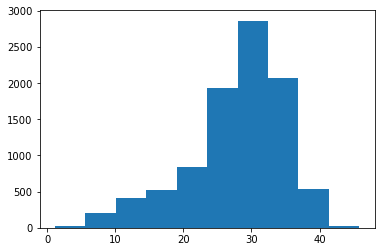

In [165]:
netdf.describe()
plt.hist(netdf['Composite_Raw'])

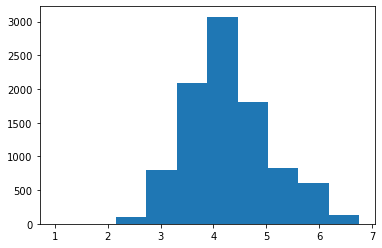

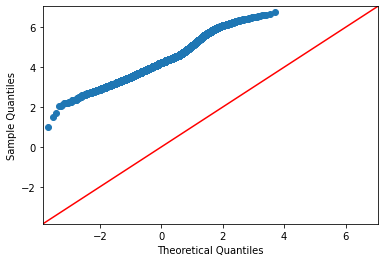

In [166]:
#The composite raw score data is skewed to the left. To normalize the data, a square root function can be used
netdf.insert(len(netdf.columns), 'Composite_Score', np.sqrt(max(netdf['Composite_Raw']+1) - netdf['Composite_Raw'])) #Square root function to normalize scoring system
plt.hist(netdf['Composite_Score'])
fig = sm.qqplot(netdf['Composite_Score'], line='45') #The new composite scoring system is fairly normal now because the blue line is fairly diagonal
netdf = netdf.drop(['Composite_Raw',], axis=1)

In [167]:
netdf.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,Composite_Score
count,9417.000000,9417.000000,9417.000000,9417.000000,5226.000000,6376.000000,9.415000e+03,9417.000000
mean,5.540880,6.955517,70.401906,62.696811,9.735936,16.035602,6.014725e+04,4.275981
std,2.447241,0.899681,21.797799,14.337643,19.524116,32.209094,1.463837e+05,0.789921
min,0.600000,1.600000,-5.995457,6.000000,1.000000,1.000000,5.000000e+00,1.000000
25%,3.400000,6.500000,62.000000,56.000000,1.250000,2.000000,9.695000e+02,3.728334
50%,5.300000,7.000000,74.803264,64.595764,4.000000,6.000000,6.602000e+03,4.204966
75%,8.100000,7.500000,85.821271,72.481596,9.000000,15.000000,5.098700e+04,4.687737
max,9.800000,9.700000,120.711628,100.000000,300.000000,386.000000,2.354197e+06,6.759327


In [168]:
#The composite score can be scaled to a larger range to increase the spread in values.
#We can scale the mean of the composite score to 50
netdf['Composite_Score'] = netdf['Composite_Score'] * 11.6932231458 # Mean of comp score is 4.275981 so to make it 50, the data set must be multiplied by 11.6932231458
netdf.describe()
# Min score is 12.493 and max score is 79.006 so we can establish the range of the composite score from 10-80

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,Composite_Score
count,9417.000000,9417.000000,9417.000000,9417.000000,5226.000000,6376.000000,9.415000e+03,9417.000000
mean,5.540880,6.955517,70.401906,62.696811,9.735936,16.035602,6.014725e+04,50.000006
std,2.447241,0.899681,21.797799,14.337643,19.524116,32.209094,1.463837e+05,9.236719
min,0.600000,1.600000,-5.995457,6.000000,1.000000,1.000000,5.000000e+00,11.693223
25%,3.400000,6.500000,62.000000,56.000000,1.250000,2.000000,9.695000e+02,43.596237
50%,5.300000,7.000000,74.803264,64.595764,4.000000,6.000000,6.602000e+03,49.169603
75%,8.100000,7.500000,85.821271,72.481596,9.000000,15.000000,5.098700e+04,54.814759
max,9.800000,9.700000,120.711628,100.000000,300.000000,386.000000,2.354197e+06,79.038324


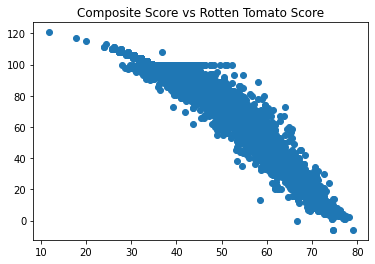

Spearmans correlation: -0.967


In [169]:
#Measured the correlation between Composite Score and Rotten Tomato Score 
pyplot.scatter(netdf['Composite_Score'], netdf['Rotten Tomatoes Score'])
pyplot.title('Composite Score vs Rotten Tomato Score')
pyplot.show()
spearman, _ = spearmanr(netdf['Composite_Score'], netdf['Rotten Tomatoes Score'])
print('Spearmans correlation: %.3f' % spearman)

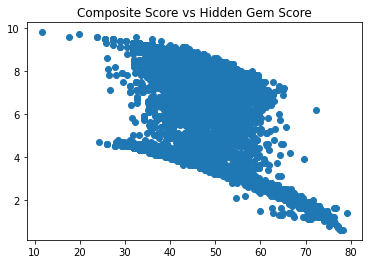

Spearmans correlation: -0.542


In [170]:
#Measured the correlation between Composite Score and Hidden Gem Score
pyplot.scatter(netdf['Composite_Score'], netdf['Hidden Gem Score'])
pyplot.title('Composite Score vs Hidden Gem Score')
pyplot.show()
spearman, _ = spearmanr(netdf['Composite_Score'], netdf['Hidden Gem Score'])
print('Spearmans correlation: %.3f' % spearman)

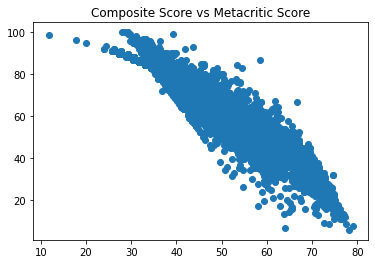

Spearmans correlation: -0.948


In [171]:
#Measured the correlation between Composite Score and Metacritic Score
pyplot.scatter(netdf['Composite_Score'], netdf['Metacritic Score'])
pyplot.title('Composite Score vs Metacritic Score')
pyplot.show()
spearman, _ = spearmanr(netdf['Composite_Score'], netdf['Metacritic Score'])
print('Spearmans correlation: %.3f' % spearman)

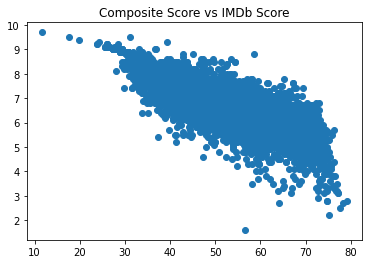

Spearmans correlation: -0.838


In [172]:
#Measured the correlation between Metacritic Score and IMDb Score
pyplot.scatter(netdf['Composite_Score'], netdf['IMDb Score'])
pyplot.title('Composite Score vs IMDb Score')
pyplot.show()
spearman, _ = spearmanr(netdf['Composite_Score'], netdf['IMDb Score'])
print('Spearmans correlation: %.3f' % spearman)

In [173]:
#All of the original rating systems have a strong or relatively strong negative correlation with the composite score.
#Since all the other rating systems favor higher numerical ratings, the composite scoring system favors lower numerical ratings.
#As such, 10 is the best score and 80 is the worst score in the composite scoring system.
#Thus, Netflix titles that have a lower score on the composite scoring system are, on average, rated highly on IMDb, Rotten Tomatoes, Metacritic, and Hidden Gem Score.

In [174]:
#Created a bar graph to visualize the composite scores of movies and series
smdf = netdf[['Title','Series or Movie', 'Composite_Score']].copy()
smsize = smdf.groupby(['Series or Movie']).size().to_frame('Content')
smscore = smdf.groupby('Series or Movie')[['Composite_Score']].mean() 
sm = pd.concat([smsize, smscore],axis=1)
sm = sm.reset_index().rename_axis(None, axis=1)
sm = sm.sort_values(by=['Content'],ascending=False)
sm5= sm5.sort_values(by=['Composite_Score'])
fig1=px.bar(sm5,x='Composite_Score',y='Series or Movie',title='Series vs Movies Rating', text = 'Composite_Score')
fig1.show()

In [175]:
#Created a bar graph to visualize the amount of both movies and series
smdf = netdf[['Title','Series or Movie', 'Composite_Score']].copy()
smsize = smdf.groupby(['Series or Movie']).size().to_frame('Content')
smscore = smdf.groupby('Series or Movie')[['Composite_Score']].mean() 
sm = pd.concat([smsize, smscore],axis=1)
sm = sm.reset_index().rename_axis(None, axis=1)
sm = sm.sort_values(by=['Content'],ascending=False)
sm5 = sm.head()
sm5= sm5.sort_values(by=['Content'])
fig1=px.bar(sm5,x='Content',y='Series or Movie',title='Series vs Movie Content', text = 'Content')
fig1.show()

In [ ]:
#Created a scoring system known as NetfScore while visualizing the data.
#The NetfScore is a ratio between the instances of an element in a column and 
#the average composite score of the element.
#The NetfScore allows elements in a column to be ranked based on both their average rating(composite score)
#and their prelevance in the dataset.
#The NetfScore has no set range as it has been devised to work as a ratio between an element's instances 
#and its average composite score.
#The NetfScore can be used to compare an element against other elements in the same column
#The NetfScore is used to rank the top 5 directors, countries, and genres on Netflix in this analysis

In [176]:
#Created a bar graph to visualize the top 5 directors based on content ratings and quantity
directordf = netdf.assign(Directors = netdf['Director'].str.split(',')).explode('Directors')
include = ['Directors','Composite_Score']
cols = directordf.columns.difference(include)
directordf[cols] = directordf[cols].mask(directordf.index.to_series().duplicated(), None)
directordf = directordf.reset_index(drop=True)
directorsize = directordf.groupby(['Directors']).size().to_frame('Content')
directorscore = directordf.groupby('Directors')[['Composite_Score']].mean() 
director = pd.concat([directorsize, directorscore],axis=1)
director = director.reset_index().rename_axis(None, axis=1)
director.rename( columns={0 :'Content'}, inplace=True )
director = director.assign(NetfScore = lambda x: round(director['Content'] / director['Composite_Score'], 3)) #Directors with the greatest amt of content and lowest composite score are ranked highest
director = director.sort_values(by=['NetfScore'],ascending=False)
directors5=director.head()
directors5=directors5.sort_values(by=['NetfScore'])
fig1=px.bar(directors5, x='NetfScore', y='Directors', title='Top 5 Directors Based on Content Ratings and Quantity on Netflix', text = 'NetfScore')
fig1.show()

In [177]:
#Created a bar graph to visualize the top 5 directors based on content quantity
directordf = netdf.assign(Directors = netdf['Director'].str.split(',')).explode('Directors')
include = ['Directors','Composite_Score']
cols = directordf.columns.difference(include)
directordf[cols] = directordf[cols].mask(directordf.index.to_series().duplicated(), None)
directordf = directordf.reset_index(drop=True)
directorsize = directordf.groupby(['Directors']).size().to_frame('Content')
directorscore = directordf.groupby('Directors')[['Composite_Score']].mean() 
director = pd.concat([directorsize, directorscore],axis=1)
director = director.reset_index().rename_axis(None, axis=1)
director.rename( columns={0 :'Content'}, inplace=True )
director = director.sort_values(by=['Content'],ascending=False)
directors5=director.head()
directors5=directors5.sort_values(by=['Content'])
fig1=px.bar(directors5, x='Content', y='Directors', title='Top 5 Directors Based on Content Quantity on Netflix', text = 'Content')
fig1.show()

In [178]:
#Created a bar graph to visualize the top 5 countries based on content ratings and availability
countrydf = netdf.assign(Country = netdf['Country Availability'].str.split(',')).explode('Country')
include = ['Country','Composite_Score']
cols = countrydf.columns.difference(include)
countrydf[cols] = countrydf[cols].mask(countrydf.index.to_series().duplicated(), None)
countrydf = countrydf.reset_index(drop=True)
countrysize = countrydf.groupby(['Country']).size().to_frame('Content')
countryscore = countrydf.groupby('Country')[['Composite_Score']].mean() 
country = pd.concat([countrysize, countryscore],axis=1)
country = country.reset_index().rename_axis(None, axis=1)
country = country.assign(NetfScore = lambda x: round(country['Content'] / country['Composite_Score'], 3)) #Countries with the greatest amt of content and lowest composite score are ranked highest
country = country.sort_values(by=['NetfScore'],ascending=False)
country5= country.head()
country5= country5.sort_values(by=['NetfScore'])
fig1=px.bar(country5, x='NetfScore', y='Country', title='Top 5 Countries in Best Rated Content and Availability on Netflix', text = 'NetfScore')
fig1.show()

In [179]:
#Created a bar graph to visualize the top 5 countries based on content availability
countrydf = netdf.assign(Country = netdf['Country Availability'].str.split(',')).explode('Country')
include = ['Country','Composite_Score']
cols = countrydf.columns.difference(include)
countrydf[cols] = countrydf[cols].mask(countrydf.index.to_series().duplicated(), None)
countrydf = countrydf.reset_index(drop=True)
countrysize = countrydf.groupby(['Country']).size().to_frame('Content')
countryscore = countrydf.groupby('Country')[['Composite_Score']].mean() 
country = pd.concat([countrysize, countryscore],axis=1)
country = country.reset_index().rename_axis(None, axis=1)
country = country.sort_values(by=['Content'],ascending=False)
country5= country.head()
country5= country5.sort_values(by=['Content'])
fig1=px.bar(country5, x='Content', y='Country', title='Top 5 Countries in Content Availablity on Netflix', text = 'Content')
fig1.show()

In [180]:
#Created a bar graph to visualize the top 5 movie/TV ratings
ratingdf = netdf[['Title','View Rating', 'Composite_Score']].copy()
ratingsize = ratingdf.groupby(['View Rating']).size().to_frame('Content')
ratingscore = ratingdf.groupby('View Rating')[['Composite_Score']].mean() 
rating = pd.concat([ratingsize, ratingscore],axis=1)
rating = rating.reset_index().rename_axis(None, axis=1)
rating = rating.sort_values(by=['Content'],ascending=False)
rating = rating.drop(labels=9, axis=0) #This index contained 'Not Rated' movies. Dropped this index, because we want to display Top 5 ratings.
rating5 = rating.head()
rating5= rating5.sort_values(by=['Content'])
fig1=px.bar(rating5,x='Content',y='View Rating',title='Top 5 Movie/TV Show Ratings on Netflix', text = 'Content')
fig1.show()

In [181]:
#Created a bar graph to visualize the top 5 genres based on best rated content and content quantity
genredf = netdf.assign(Genres = netdf['Genre'].str.split(',')).explode('Genres')
include = ['Genres','Composite_Score']
cols = genredf.columns.difference(include)
genredf[cols] = genredf[cols].mask(countrydf.index.to_series().duplicated(), None)
countrydf = genredf.reset_index(drop=True)
genresize = genredf.groupby(['Genres']).size().to_frame('Content')
genrescore = genredf.groupby('Genres')[['Composite_Score']].mean() 
genre = pd.concat([genresize, genrescore],axis=1)
genre = genre.reset_index().rename_axis(None, axis=1)
genre = genre.assign(NetfScore = lambda x: round(genre['Content'] / country['Composite_Score'], 3))
genre = genre.sort_values(by=['NetfScore'],ascending=False)
genre = genre.drop(labels=35, axis=0)
genre5= genre.head()
genre5= genre5.sort_values(by=['NetfScore'])
fig1=px.bar(genre5, x='NetfScore', y='Genres', title='Top 5 Available and Best Rated Genres on Netflix', text = 'NetfScore')
fig1.show()

In [182]:
#Created a bar graph to visualize the top 5 genres based on content quantity
genredf = netdf.assign(Genres = netdf['Genre'].str.split(',')).explode('Genres')
include = ['Genres','Composite_Score']
cols = genredf.columns.difference(include)
genredf[cols] = genredf[cols].mask(countrydf.index.to_series().duplicated(), None)
countrydf = genredf.reset_index(drop=True)
genresize = genredf.groupby(['Genres']).size().to_frame('Content')
genrescore = genredf.groupby('Genres')[['Composite_Score']].mean() 
genre = pd.concat([genresize, genrescore],axis=1)
genre = genre.reset_index().rename_axis(None, axis=1)
genre = genre.sort_values(by=['Content'],ascending=False)
genre = genre.drop(labels=35, axis=0)
genre5= genre.head()
genre5= genre5.sort_values(by=['Content'])
fig1=px.bar(genre5, x='Content', y='Genres', title='Top 5 Available Genres on Netflix', text = 'Content')
fig1.show()

In [183]:
#Created a bar graph to visualize the top 5 languages 
langdf = netdf.assign(Language = netdf['Languages'].str.split(',')).explode('Language')
include = ['Language','Composite_Score']
cols = langdf.columns.difference(include)
langdf[cols] = langdf[cols].mask(countrydf.index.to_series().duplicated(), None)
langdf = langdf.reset_index(drop=True)
langsize = langdf.groupby(['Language']).size().to_frame('Content')
langscore = langdf.groupby('Language')[['Composite_Score']].mean() 
lang = pd.concat([langsize, langscore],axis=1)
lang = lang.reset_index().rename_axis(None, axis=1)
lang = lang.sort_values(by=['Content'],ascending=False)
lang = lang.drop(labels=45, axis=0)
lang5= lang.head()
lang5= lang5.sort_values(by=['Content'])
fig1=px.bar(lang5, x='Content', y='Language', title='Top 5 Languages on Netflix', text = 'Content')
fig1.show()

In [184]:
#Created a line graph to show the release dates of movies and tv shows available on Netflix
yeardf = netdf[['Title','Release Date', 'Composite_Score']].copy()
yeardf = yeardf.dropna()
for i in range (len(yeardf.index)):
    a = yeardf.iat[i, 1]
    b = parse(a, fuzzy=True).year
    yeardf.iat[i, 1] = ''
    yeardf.iat[i, 1] = yeardf.iat[i, 1].replace("", str(b))
    yeardf.iat[i, 1] = int(yeardf.iat[i, 1])
yeardf['Release Date'] = yeardf['Release Date'].astype(str).astype(int)
yearsize = yeardf.groupby(['Release Date']).size().to_frame('Content')
yearscore = yeardf.groupby('Release Date')[['Composite_Score']].mean() 
year = pd.concat([yearsize, yearscore],axis=1)
year = year.reset_index().rename_axis(None, axis=1)
year20=year[year['Release Date']>=2000]
fig3 = px.line(year20, x="Release Date", y="Content",title='Trend of Content Produced Over the Past 20 Years on Netflix')
fig3.show()